# Building the CNN model on Fashion MNIST dataset

In [ ]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# advance libraries

import keras
from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# check the size of data

print(x_train.shape)
print(y_train.shape)
print("* "*10)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
* * * * * * * * * * 
(10000, 28, 28)
(10000,)


In [ ]:
# 60000 is representing the number of images present in the x_train

# 28 28 representing the resolution of the image

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
# we can see that the images are stored in the form of array in numeric value


In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

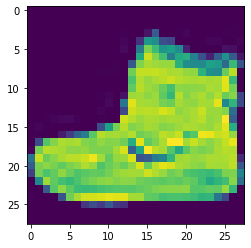

In [ ]:
plt.imshow(x_train[0])

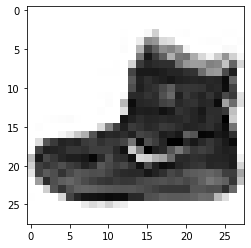

In [ ]:
plt.imshow(x_train[0],cmap="Greys")

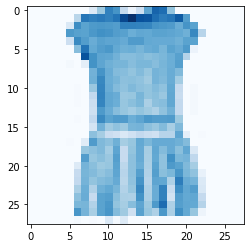

In [ ]:
plt.imshow(x_train[3],cmap="Blues")  # Reds,Blues,Greys

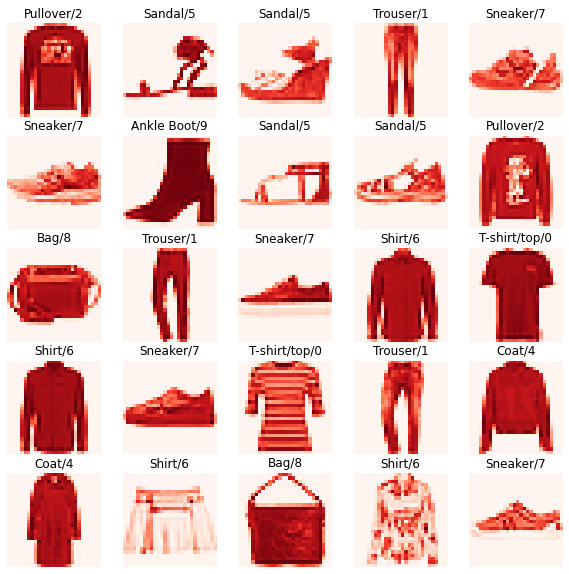

In [ ]:
plt.figure(figsize=(10,10))
j=1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Reds")
  plt.axis("off")
  plt.title("{}/{}".format(class_labels[y_train[i]],y_train[i]))

# Changing the dimension 


In [ ]:
x_train.ndim

3

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = np.expand_dims(x_train,-1)

x_test = np.expand_dims(x_test,-1)

In [ ]:
print(x_train.shape)

print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

# Feature Scaling

In [ ]:
x_train = x_train/255

x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Splitting The Dataset

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
                                            x_train,
                                            y_train,
                                            random_state=42,
                                            test_size=0.2
)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

In [ ]:
x_val.shape

(12000, 28, 28, 1)

# Building the Convolution Neural Network

In [ ]:
model = keras.models.Sequential([
                    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation="relu",input_shape=[28,28,1]),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                    keras.layers.Conv2D(filters=12,kernel_size=3,strides=(1,1),padding="valid",activation="relu"),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                    keras.layers.Flatten(),
                    keras.layers.Dense(units=128,activation="relu"),
                    keras.layers.Dense(units=50,activation="relu"),
                    keras.layers.Dense(units=10,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(
          optimizer="adam",
          loss="sparse_categorical_crossentropy",
          metrics=["accuracy"]
)

In [ ]:
model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    verbose=True,
    validation_data=(x_val,y_val)
)

Epoch 1/30
94/94 [==============================] - 11s 14ms/step - loss: 0.6342 - accuracy: 0.7835 - val_loss: 0.4141 - val_accuracy: 0.8583
Epoch 2/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3855 - accuracy: 0.8661 - val_loss: 0.3605 - val_accuracy: 0.8732
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3398 - accuracy: 0.8819 - val_loss: 0.3235 - val_accuracy: 0.8857
Epoch 4/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3062 - accuracy: 0.8927 - val_loss: 0.3268 - val_accuracy: 0.8820
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2896 - accuracy: 0.8972 - val_loss: 0.3097 - val_accuracy: 0.8867
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2714 - accuracy: 0.9036 - val_loss: 0.2901 - val_accuracy: 0.8975
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2564 - accuracy: 0.9100 - val_loss: 0.2833 - val_accuracy: 0.8980
Epoch 8/30
94/94 [

# Testing the model accuracy on the testing data


In [ ]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0))).round(2)

1/1 [==============================] - 0s 17ms/step


9

In [ ]:
y_test[0]

9

In [ ]:
y_pred = model.predict(x_test).round(2)

y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2742 - accuracy: 0.9142


[0.2742345631122589, 0.9142000079154968]

# Plotting the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

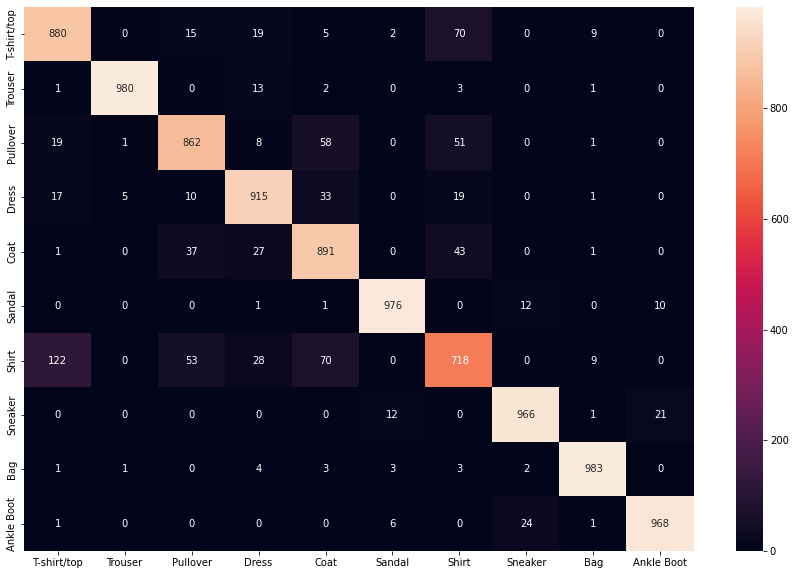

In [ ]:
plt.figure(figsize=(15,10))

y_pred_lables = [np.argmax(label) for label in y_pred]

cnf = confusion_matrix(y_test,y_pred_lables)

sns.heatmap(cnf,annot=True,fmt="d",xticklabels=class_labels,yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
clf = classification_report(y_test,y_pred_lables,target_names= class_labels)

print(clf)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.72      0.75      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

